# What is a Neural Network?

![text](images/neuron.jpg "Neuron")

So a neuron has n inputs and for each input has a weight. The first thing a neuron will do is compute the weighted average of the inputs based on its weights. Once it has done that, it will typically have an activation function that will somehow transform the weighted average that the neuron has computed. It will then output the result.

So why is this called a neuron? Well, it somewhat corresponds to the structure of a neuron in the brain:

![text](images/brain-neuron.png "Brain Neuron")

Example:
    
* Inputs: [10, 0, -5]
* Weights: [1/3, 1/3, 1/3]
* Activation: sign(x)

What will be the output?

### Common Activation Functions

There are a few functions that are commonly used as activation functions for neurons in neural networks.

For example, the relu function and the sigmoid function:



ReLU | Sigmoid
- | - 
![text](images/relu.png "Relu") | ![text](images/sigmoid.png "Brain Neuron")

### Connecting neurons to create a network:

Ok, so now that we understand what a single neuron is doing, a network is not that much more complicated. It is simply a number of layers of neurons connected to each other via weights.

![text](images/nn-example-nums.png "nn-examples")

In theory you can have as many hidden layers as you want. And each neuron in layer L will have a weight for every single neuron in layer L - 1. This architecture is called a 'fully-connected' neuron network because every single neuron is connected via a weight to all of the neurons in the prior layer. In other architectures this might not be the case.

The output layer is also really important, and will look different depending on the specific problem you are trying to solve. Today, we will be doing classification. That is, we will have an image, and we will need to classify it as one of 10 types of articles of clothing. We will actually want our output layer to output the probability of each image belonging to each class, that is we want a 10-dimensional vector where the sum of the vector is 1 and the number in each row corresponds to the probability of the image belonging to that class.

For other problems, you might want output layers that look different. For example, you might want a single neuron that outputs a number if you are trying to predict housing prices.

### Neural Networks for multi-class classification

Let's walk through an example of a neural network that can do multi-class classification. The input layer will be whatever inputs we have. In our case it's going to be all of the pixels of different images, but of course the inputs will vary for every problem. Maybe we have information about voters (Age, Address, Income) and want to predict Democrat, Republican, Independent, etc.

1) Input layer: pixels of a photograph <br />
2) Hidden layer 1: Each neuron is weighted sum of layer 1 with ReLU activation <br />
3) Hidden layer 2: Each neuron is weighted sum of layer 2 with ReLU activation <br />
4) Output layer: 10 neurons, each is a weighted sum of all the neurons in layer 2 with softmax activation

### Feed-forward process review

See whiteboard

### Objective function

Ok so now that we have a way to calculate a prediction, how do we figure out the best weights? Well, we can actually model the problem with a cost function and then choose the weights that minimize the cost.

Our cost function today will be the following:

![text](images/cost.png "cost")

I wouldn't worry too much about the specifics, if you are interested look up Softmax Regression, but intuitively, what is going on is the following: 

* The cost function is a sum of the cost of all of my training examples (hence sum from i=1 to m)
* The cost of a single example is some measure of how wrong my prediction was. The more wrong I am, the more cost I incur.
* The cost is a function of the weights to the prior layer and the outputs of the prior layer.

Ok so now we are ready to talk about the entire algorithm that we will implement today:
    
1) Randomly initiatilize all weights <br />
2) Make predictions based on curent weights <br />
3) Evaluate how I am doing using the cost function <br />
4) Use calculus / optimization to find slightly better weights <br />
5) Repeat from 2

### Questions???

I know that was a lot and we went very quickly, want to make sure everybody is good up to this point

### Installs

Take a few minutes and make sure you have all the installs you need: https://machinelearningmastery.com/setup-python-environment-machine-learning-deep-learning-anaconda/

# What is Tensorflow?

TensorFlow is a powerful open source library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning.

The basic principle of TensorFlow is simple - defined a computation graph for your calculation (for example, the one below), and TensorFlow takes that graph and runs it efficiently. It can also do autodifferentiation of your computation graph.

![text](images/computation-graph.png "cost")


Other background information about TensorFlow:

* Created and maintained by Google
* Open-sourced in 2015
* Can run computation graphs across many CPUs / GPUs
* API in python that is compatibile with other ML libraries like Scikit-Learn
* Other high-level APIs have been built on top of TensorFlow (e.g. Keras)
* Operations are implemented in C++
* Can optimize arbitrary functions using automatic differentiating (or autodiff)
* Particularly well-suited for Deep Neural Networks
* Off the shelf visualization tool called TensorBoard
* Popular open-source project on GitHub

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
a = tf.Variable(3, name="a")             # Initializes a variable
b = tf.Variable(4, name="b")
w = tf.constant(3)                       # Initializes a constant


c = a+b                                  # Variabes can be functions of other variables and constants
d = b-1
e = c*d

init = tf.global_variables_initializer() # adds step in computation graph to first initialize all the variables

The code above does not compute anything! It simply creates a computation graph. This is what is called the "construction phase" of a TensorFlow program.

To run a computation, you need to open what is called a TensorFlow session and use it to execute the computation graph. The session will actually place the operations onto CPUs / GPUs and running them. This step is called the "execution phase" of a TensorFlow program.

In [3]:
with tf.Session() as sess:   # This is where stuff actually happens
    init.run()               # actually initializes the variables
    result = e.eval()        # evaluates the computation graph
    print(result)

21


In TensorFlow, you can also create a placeholder, which is an object whose value you will specify later

In [4]:
# Change the value of x in the feed_dict
with tf.Session() as sess:
    x = tf.placeholder(tf.int64, name = 'x')
    print(sess.run(2 * x, feed_dict = {x: 3}))

6


# Exercise 1

Let's say I have the following matrices:

In [5]:
np.random.seed(1)         # To ensure that we all get the same answers
    
X = np.random.randn(3, 1)  # X is a 3 x 1 matrix
W = np.random.randn(4, 3)  # W is a 4 x 3 matrix
b = np.random.randn(4, 1)  # b is a 4 x 1 vector

Compute Y = W * X + b

You might want to use:
- tf.matmul(..., ...) to do a matrix multiplication
- tf.add(..., ...) to do an addition (though '+' should also work just fine)

In [6]:
with tf.Session() as sess:

    # Implement Y
    Y = None
    
    init.run()                 
    result = Y.eval()
    print(result)

[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


*** Expected Output ***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

# OK - Let's Build a Neural Network from Scratch!

Let's import the things we need:

In [7]:
from utils.mnist_reader import load_mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime

First, let's pull in the data:

In [8]:
X_train_raw, y_train_raw = load_mnist('data/fashion', kind='train')
X_test_raw, y_test_raw = load_mnist('data/fashion', kind='t10k')

What does our data look like?

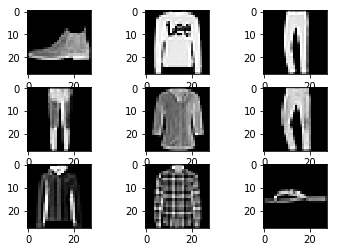

In [9]:
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_raw[i].reshape(28,28), cmap='gray', interpolation='none')

Normalize the data between 0 and 1 - this speeds up training

In [10]:
X_train = X_train_raw.astype('float32') / 255
X_test = X_test_raw.astype('float32') / 255
y_train = y_train_raw.astype('float32')
y_test = y_test_raw.astype('float32')

In [11]:
print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 784)
Y_train shape: (60000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)


In [12]:
n_inputs = 28*28  # Number of inputs for each training example
n_hidden1 = 100
n_hidden2 = 30
n_outputs = 10    # Notice this matches the number of classes we have

In [13]:
tf.reset_default_graph()

# Saving time and directories for logging
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

# Exercise 2

We want to write a function that will take in the results of a prior layer in our NN and output the results of the next layer. The function will take in the results of the prior layer - X, the number of neurons we want for that layer, and the activation function, and returns the output of the layer.

Implementation details:

* b should be a tensorflow variable of a n_neurons dimensional zero vector (you might want to use tf.zeros, and make sure you pass it the argument name="b")
* Z = X * W + b
* W has dimensions (Number of inputs from prior layer) x (Number of neurons in this layer).
* If activation is None, use the identity function, otherwise use the function passed in.



In [14]:
def neuron_layer(X, n_neurons, name, activation=None):
    """
    Creates a generic layer of neurons.
    
    Arguments:
    X -- the results of the prior layer. X is M x N where M = instances and N = number of neurons in prior layer
    n_neurons -- the number of neurons desired for the layer.
    activation -- the activation function in the layer. If None, activation is the identity function.
    
    Returns:
    Z = activation(X * W + b)
    """
    #Create name for layer - helpful for viz later
    with tf.variable_scope(name):    
        
        # Gets the number of inputs for each instance
        n_inputs = int(X.get_shape()[1])      
        
        # The following three lines create a matrix of weights, such that for 
        # each input i from the prior layer and each neuron j in this layer, W[i, j] will be the weight
        # of the input i for neuron j.
        #
        # For technical reasons, we want to initialize our weights randomly, and not only that, but
        # in practice, specific distributions have been shown to improve training significantly. One
        # of the used initialization schemes is called Xavier initialization, which we use here.
        W = tf.get_variable("W", ???, initializer = tf.contrib.layers.xavier_initializer(seed=1))
        
        ???

# Exercise 3: Construct the NN architecture!

Great, so now all we have to do is construct our actual layers. For each layer, call the neuron_layer function. For the hidden layers use tf.nn.relu as the activation. But for the output layer,  Make sure to pass in names for all of your layers. For each layer, call the neuron_layer function. However, for the final layer we will use no activation function for now. The reason for this is that tensorflow will handle the softmax portion of this under the hood.

In [15]:
with tf.name_scope("DNN"): #DNN = Deep Neural Network!
    
    # Our first hidden layer
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation = tf.nn.relu)
    
    # Second hidden layer
    hidden2 = ???
    
    # Output layer
    outputs = ???


In [16]:
with tf.name_scope("loss"):
    # Defining our loss function
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=outputs)
    loss = tf.reduce_mean(cross_entropy, name="loss")
    loss_summary = tf.summary.scalar("cross_entropy_loss", loss)
    


In [17]:
learning_rate = 0.03

with tf.name_scope("train"):
    
    # Define an optimizer for our loss function - here we use GradientDescent, but we could use many others!
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    
    # What do we want our optimizer to do?
    training_op = optimizer.minimize(loss)

### Auto-differentiation

Discussion - what is backpropogation? How does optimization work on neural networks?

In [18]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    acc_summary = tf.summary.scalar("accuracy", accuracy)


In [19]:
init = tf.global_variables_initializer()

### Batching training examples

The cost function we discussed above was expressed as a sum of all of the training examples. However, in practice it is often a lot faster to use small chunks of the overall training example at once. So our process would look like this:

1) Randomly initiatilize all weights <br />
2) Make predictions based on curent weights for some small batch of random training examples <br />
3) Evaluate how I am doing using the cost function on this batch of random training examples <br />
4) Use calculus / optimization to find slightly better weights <br />
5) Repeat from 2


In [20]:
def next_batch(num, data, labels):
    '''
    Return a total of num random samples and labels. 
    '''
    idx = np.arange(0 , data.shape[0])
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [21]:
merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter(logdir + '/train', graph=tf.get_default_graph())
test_writer = tf.summary.FileWriter(logdir + '/test', graph=tf.get_default_graph())

In [ ]:
# epochs = how many times will I look at all of my examples
n_epochs = 30
# batch_size = how many examples will be in each batch
batch_size = 32

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        
        for iteration in range(X_train.shape[0] // batch_size):
            X_batch, y_batch = next_batch(batch_size, X_train, y_train)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})        
        
        # Logging the results to tensorboard
        summaries_train = sess.run(merged, feed_dict={X: X_train, y: y_train})
        train_writer.add_summary(summaries_train, epoch)

        summaries_test = sess.run(merged, feed_dict={X: X_test, y: y_test})
        test_writer.add_summary(summaries_test, epoch)
        
        
        # Printing accuracy as we train
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
train_writer.close()
test_writer.close()

0 Train accuracy: 0.838267 Test accuracy: 0.826
1 Train accuracy: 0.8624 Test accuracy: 0.8503
2 Train accuracy: 0.863633 Test accuracy: 0.8476
3 Train accuracy: 0.87725 Test accuracy: 0.8606
4 Train accuracy: 0.87845 Test accuracy: 0.8602
5 Train accuracy: 0.88695 Test accuracy: 0.8635
6 Train accuracy: 0.889567 Test accuracy: 0.8667
7 Train accuracy: 0.896167 Test accuracy: 0.8742


In [ ]:
#tensorboard --logdir=logdir


# Regularization

Looks like our neural network is overfitting! Let's apply dropout!

Dropout is a way of preventing overfitting of a neural network and is frequently used in practice. The concept is fairly simple: at every training step, every neuron in the network (excluding the output neurons) has a probability p of being dropped out - meaning that it will be entirely ignored in this training step. The hyperparameter p is called the dropout rate and is typically set in the 25-50% range.

Why does dropout work?

* Prevents neurons from co-adapting with neighboring neurons and learning complex, fluke-y features from random noise
* Neurons are less sensitive to small changes in inputs
* Neurons cannot rely on any single feature to make predictions, but rather must learn different and independent features.


In [ ]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [ ]:
training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.25
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

In [ ]:
with tf.name_scope("DNN"): #DNN = Deep Neural Network!
    
    # Our first hidden layer
    hidden1 = neuron_layer(X_drop, n_hidden1, name="hidden1", activation = tf.nn.relu)
    
    hidden1_drop = tf.layers.dense(hidden1, n_hidden1, activation=tf.nn.relu, name="hidden1")
    
    # Second hidden layer
    hidden2 = neuron_layer(hidden1_drop, n_hidden2, name="hidden2", activation = tf.nn.relu)
    
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    
    # Output layer
    logits = neuron_layer(hidden2_drop, n_outputs, name="outputs")


In [ ]:
with tf.name_scope("loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(cross_entropy, name="loss")
    


In [ ]:
learning_rate = 0.03

with tf.name_scope("train"):
    
    # Define an optimizer - here we use GradientDescent, but we could use many others!
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    
    # What do we want our optimizer to do?
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


In [ ]:
init = tf.global_variables_initializer()

In [ ]:
n_epochs = 30
batch_size = 32

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(X_train.shape[0] // batch_size):
            X_batch, y_batch = next_batch(batch_size, X_train, y_train)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training:True})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        